# Bioinfo Projekt Gruppe 4-4: k-means 
*Members: Benedict, Julia, Thorge and Marilena*

Just as compact as possible

## PBMC Dataset

In [29]:
from WWDK_Package import Cluster
from WWDK_Package import Data
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
daten = Data.Loader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")

In [9]:
df_pbmc = daten._to_df()
norm = preprocessing.normalize(df_pbmc)
scaled = preprocessing.scale(norm)

#### PCA

In [10]:
pca = PCA()
pca_pbmc = pca.fit_transform(df_pbmc)


#### t-sne

In [23]:
tsne = TSNE()
pbmc_tsne =tsne.fit_transform(pca_pbmc)

#### UMAP

In [30]:
umap = umap.UMAP()
pbmc_umap =umap.fit_transform(pca_pbmc)

### Testing kmeans

In [32]:
pbmc_tsne_clust = Cluster.Kmeans()
pbmc_umap_clust = Cluster.Kmeans()
pbmc_tsne_clust.fit(pbmc_tsne)
pbmc_umap_clust.fit(pbmc_umap)

Kmeans(inits=None, k=None, maxit=None, method=None, tol=None)

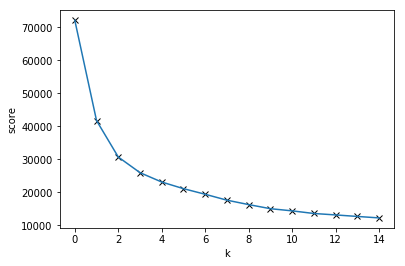

In [39]:
from WWDK_Package import Cluster as cl
liste = []
for i in range(15):
    lib = cl.Kmeans(inits=10, method="rng", k=i+1)
    lib.fit(pbmc_tsne)
    liste.append(lib.inertia_)
    #print(lib.inertia_)
plt.plot(liste, "kx")
plt.plot(liste)
plt.xlabel("k")
plt.ylabel("score")
plt.show()

/Users/benedict/Desktop/Programmieren/Bioinfoprojekt/project-04-group-04/WWDK_Package/Cluster.py:71: RuntimeWarning: Mean of empty slice.
  self.cluster_centers_[i] = self._data[position].mean(axis = 0)
/anaconda3/envs/igem/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


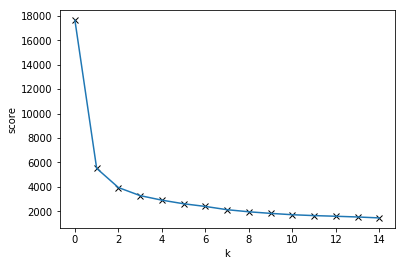

In [38]:
liste = []
for i in range(15):
    lib = cl.Kmeans(inits=10, method="rng", k=i+1)
    lib.fit(pbmc_umap)
    liste.append(lib.inertia_)
    #print(lib.inertia_)
plt.plot(liste, "kx")
plt.plot(liste)
plt.xlabel("k")
plt.ylabel("score")
plt.show()

In [35]:
def plot(data, dist, clusters,k):
    for i in range(k):
        graph = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
        center = pd.DataFrame(clusters[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        plt.plot(graph[0], graph[1], "o")
        plt.plot(center[0],center[1], "kx")
    plt.show

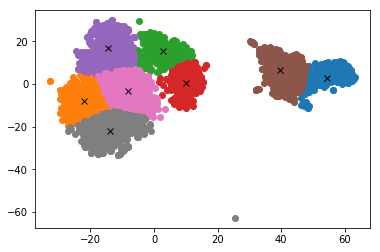

In [44]:
plot(pbmc_tsne, pbmc_tsne_clust.labels_, pbmc_tsne_clust.cluster_centers_, 8)

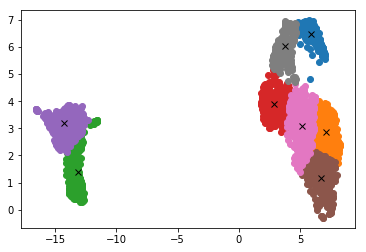

In [47]:
plot(pbmc_umap, pbmc_umap_clust.labels_, pbmc_umap_clust.cluster_centers_, 8)